In [365]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
raw_business_data = pd.read_csv('Legally_Operating_Businesses.csv',index_col = 'DCA License Number',low_memory=False)
raw_nyc_data = pd.read_csv('new_york.csv')

print(raw_nyc_data.columns)

print(raw_business_data.columns)


Index(['Zip Code', 'City', 'State', 'Population', 'Population Estimate',
       'Business Annual Payroll', 'Business First Quarter Payroll',
       'Median Age', 'Male Population', 'Female Population',
       'Median Age Female', 'Median Age Male', 'Households',
       'Persons Per Household', 'Income Per Household', 'Number of Businesses',
       'Number of Employees', 'Delivery Business', 'Delivery Residential',
       'Delivery Total', 'Average House Value', 'CBSA Population',
       'CBSA Division Population', 'CBSA Name', 'CBSA Number', 'CBSA Type',
       'City Alias Name', 'State Full Name', 'State FIPS', 'County Name',
       'County FIPS', 'Latitude', 'Longitude', 'Region', 'Division',
       'Area Code', 'DayLight Savings', 'Land Area', 'Water Area',
       'Congressional District', 'Congressional Land Area', 'Asian Population',
       'Black or African American Population',
       'American Indian or Alaskan Native Population',
       'Native Hawaiian or other Pacific Island

In [367]:
df_business = raw_business_data[raw_business_data['Address State'] == 'NY']
df_business = df_business[['License Expiration Date','License Status', 'License Creation Date','Industry','Address ZIP','Longitude', 'Latitude','Borough Code']]
df_business = df_business.dropna()

df_business

,License Expiration Date,License Status,License Creation Date,Industry,Address ZIP,Longitude,Latitude,Borough Code
DCA License Number,,,,,,,,
2034972-DCA,03/31/2020,Active,03/25/2016,Stoop Line Stand,10013,-73.997619,40.718663,1.0
2073413-1-DCA,11/30/2019,Inactive,06/14/2018,Electronic Cigarette Dealer,11385,-73.904270,40.712849,4.0
2054177-DCA,12/31/2020,Inactive,06/08/2017,Electronics Store,11207,-73.888084,40.655199,3.0
2013293-DCA,06/30/2020,Active,09/12/2014,Electronic & Appliance Service,10022,-73.971827,40.757216,1.0
1319879-DCA,03/31/2020,Active,05/27/2009,Stoop Line Stand,10013,-73.996970,40.718101,1.0
2064637-DCA,06/30/2020,Inactive,01/08/2018,Electronic & Appliance Service,11226,-73.949515,40.650365,3.0
2024267-DCA,07/31/2021,Active,06/12/2015,Secondhand Dealer - General,10001,-73.987978,40.749547,1.0
2021138-DCA,12/31/2020,Active,04/15/2015,Electronics Store,10033,-73.934357,40.848482,1.0
2055676-DCA,06/30/2020,Inactive,07/13/2017,Electronic & Appliance Service,11207,-73.888084,40.655199,3.0


In [368]:
print(raw_nyc_data.columns)
df_nyc = raw_nyc_data[['Zip Code','Congressional District','Population','Business Annual Payroll','Female Population','Median Age','Households',\
                 'Income Per Household', 'Number of Businesses','White Population']]

df_nyc.loc[:,'female_percentage'] = df_nyc['Female Population']/df_nyc['Population']
df_nyc.loc[:,'colored_percentage'] = 1-df_nyc['White Population']/df_nyc['Population']
df_nyc = df_nyc.drop(['Female Population','White Population'],axis=1)

# merge two dataframes by the intersection of column ZIP
df_nyc.rename(columns = {'Zip Code':'Address ZIP'}, inplace = True) 
df_business.loc[:,'Address ZIP'] = df_business['Address ZIP'].astype(int)
df_com = pd.merge(df_business, df_nyc, how='inner',on='Address ZIP')

df_com=df_com.dropna()

Index(['Zip Code', 'City', 'State', 'Population', 'Population Estimate',
       'Business Annual Payroll', 'Business First Quarter Payroll',
       'Median Age', 'Male Population', 'Female Population',
       'Median Age Female', 'Median Age Male', 'Households',
       'Persons Per Household', 'Income Per Household', 'Number of Businesses',
       'Number of Employees', 'Delivery Business', 'Delivery Residential',
       'Delivery Total', 'Average House Value', 'CBSA Population',
       'CBSA Division Population', 'CBSA Name', 'CBSA Number', 'CBSA Type',
       'City Alias Name', 'State Full Name', 'State FIPS', 'County Name',
       'County FIPS', 'Latitude', 'Longitude', 'Region', 'Division',
       'Area Code', 'DayLight Savings', 'Land Area', 'Water Area',
       'Congressional District', 'Congressional Land Area', 'Asian Population',
       'Black or African American Population',
       'American Indian or Alaskan Native Population',
       'Native Hawaiian or other Pacific Island

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [369]:
len(df_com)

114719

In [370]:
def downsample(df, label_col_name,n):
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    new_df=df.groupby(label_col_name).apply(lambda x: x.sample(n) if len(x) >= n else x.sample(n,replace=True)).reset_index(drop=True)
    return new_df       

df_com = downsample(df_com,'Industry',5000)



In [371]:
len(df_com)

235000

In [372]:
df_com['Congressional District'].unique()



array(['14|16', '07|08', '10|13', '14', '09|10', '06|07', '06', '10|12',
       '07|10', '11', '08|09|11', '12|14', '06|07|12', '08', '07|12',
       '07|10|12', '07|08|09', '06|14', '03|06', '12', '07|10|11',
       '08|10|11', '05|06|07', '07|09', '10', '14|15', '08|09', '15',
       '05|07', '13|16', '05', '09', '10|11', '08|09|10|11', '13|15',
       '10|12|14', '03|06|14', '16', '12|13', '05|06', '03', '13|14|15',
       '03|05', '07', '07|09|10', '13|14|16', '13', '03|05|06', '04|05',
       '03|04|05', '05|06|16', '05|07|08', '06|12|14', '03|04', '02|03',
       '20', '17', '26'], dtype=object)

In [373]:
# Transform industry using one-hot encoding

industry_dums = pd.get_dummies(df_com['Industry'])
df_com = pd.concat([df_com,industry_dums],axis=1)


df_com

,License Expiration Date,License Status,License Creation Date,Industry,Address ZIP,Longitude,Latitude,Borough Code,Congressional District,Population,...,Secondhand Dealer - General,Sidewalk Cafe,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption
0,01/16/2020,Active,01/04/2012,Amusement Arcade,10469,-73.833662,40.863803,2.0,14|16,66631,...,0,0,0,0,0,0,0,0,0,0
1,01/16/2012,Inactive,12/21/2009,Amusement Arcade,11207,-73.889742,40.657424,3.0,07|08,93386,...,0,0,0,0,0,0,0,0,0,0
2,08/17/2013,Inactive,01/22/2013,Amusement Arcade,10027,-73.952995,40.810191,1.0,10|13,59707,...,0,0,0,0,0,0,0,0,0,0
3,01/16/2012,Inactive,01/10/2002,Amusement Arcade,11104,-73.915452,40.749939,4.0,14,27232,...,0,0,0,0,0,0,0,0,0,0
4,01/16/2022,Active,04/13/2000,Amusement Arcade,11230,-73.976094,40.625265,3.0,09|10,86408,...,0,0,0,0,0,0,0,0,0,0
5,11/27/2019,Active,02/27/2019,Amusement Arcade,11385,-73.868605,40.709767,4.0,06|07,98592,...,0,0,0,0,0,0,0,0,0,0
6,01/16/2022,Active,01/31/2012,Amusement Arcade,11379,-73.892028,40.712371,4.0,06,34821,...,0,0,0,0,0,0,0,0,0,0
7,01/16/2012,Inactive,01/26/2006,Amusement Arcade,10036,-73.986349,40.755917,1.0,10|12,24711,...,0,0,0,0,0,0,0,0,0,0
8,01/16/2020,Active,03/09/2016,Amusement Arcade,11232,-74.003669,40.652954,3.0,07|10,28265,...,0,0,0,0,0,0,0,0,0,0
9,01/16/2010,Inactive,12/04/2007,Amusement Arcade,10314,-74.176411,40.601123,5.0,11,85510,...,0,0,0,0,0,0,0,0,0,0


In [374]:
# calculate life_span and right_censor
df_com.loc[:,'License Expiration Date'] = pd.to_datetime(df_com['License Expiration Date'])
df_com.loc[:,'License Creation Date'] = pd.to_datetime(df_com['License Creation Date'])
df_com['Y'] = (df_com['License Expiration Date']-df_com['License Creation Date']).dt.days
today = pd.to_datetime(pd.DataFrame({'year': [2019],'month': [11],'day': [22]}))

df_com['right_censor'] = np.where(df_com['License Expiration Date'].values > today.values,0,1)

df_com['Creation Year'] = (df_com['License Creation Date'].apply(lambda x: x.strftime('%Y'))).astype(int)



In [375]:
df_com1=df_com[0:60000]
df_com2=df_com[60001:120000]
df_com3=df_com[120001:180000]
df_com4=df_com[180001:235000]

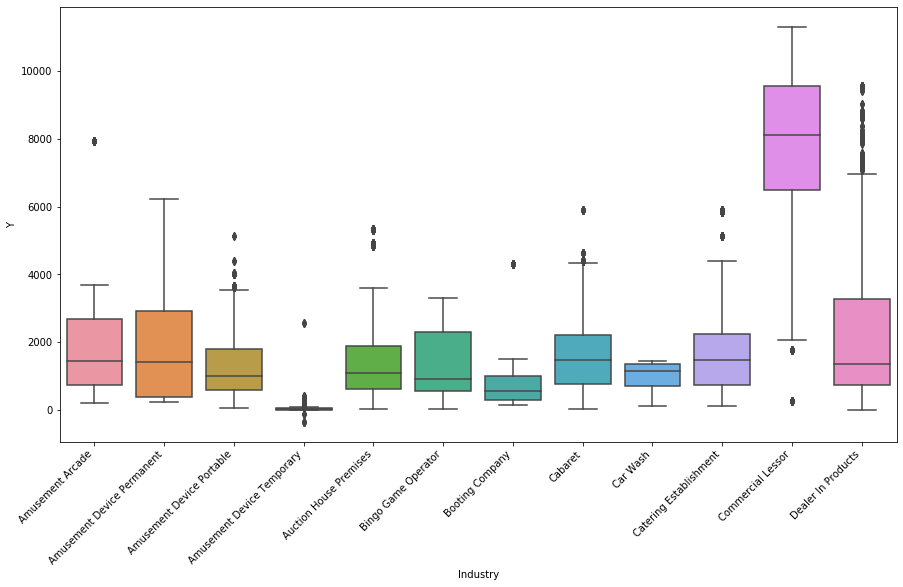

In [376]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Industry', y='Y',data=df_com1)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

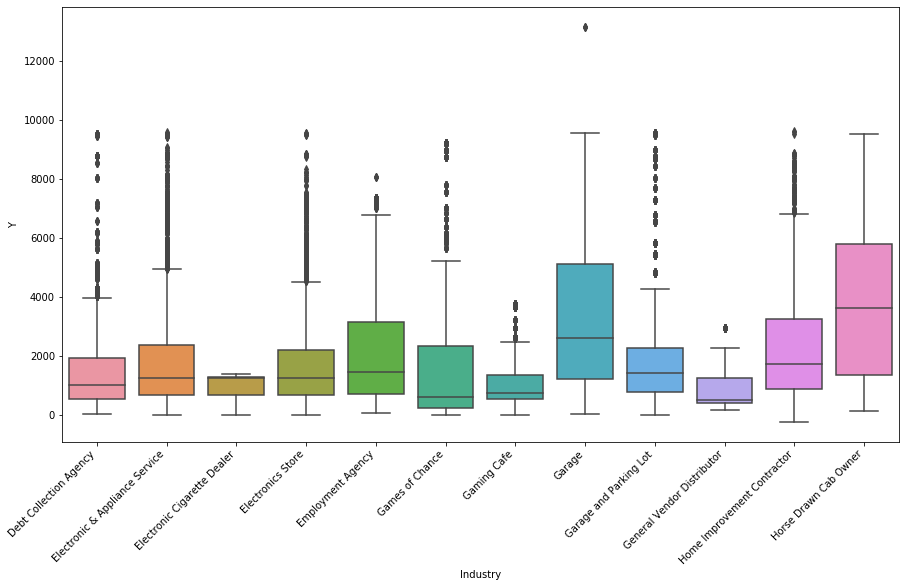

In [377]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Industry', y='Y',data=df_com2)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

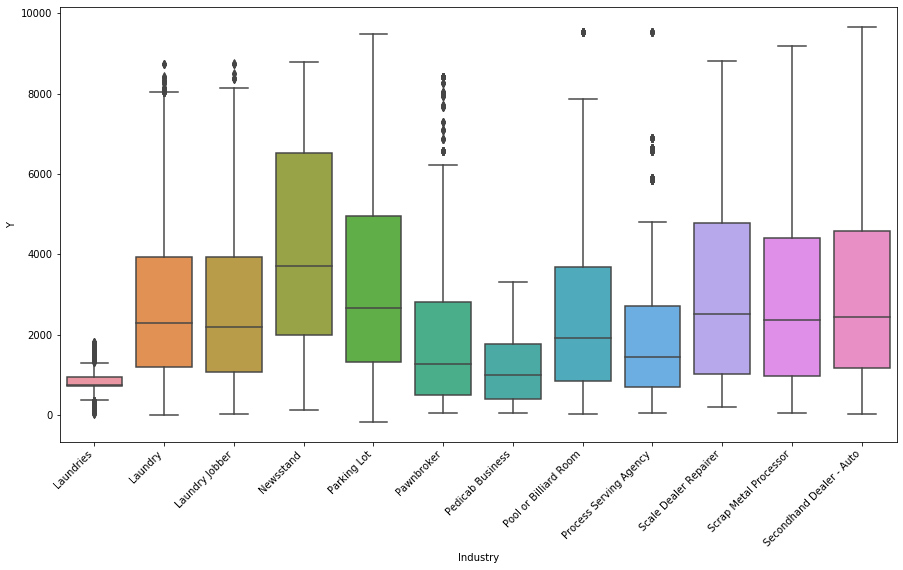

In [378]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Industry', y='Y',data=df_com3)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

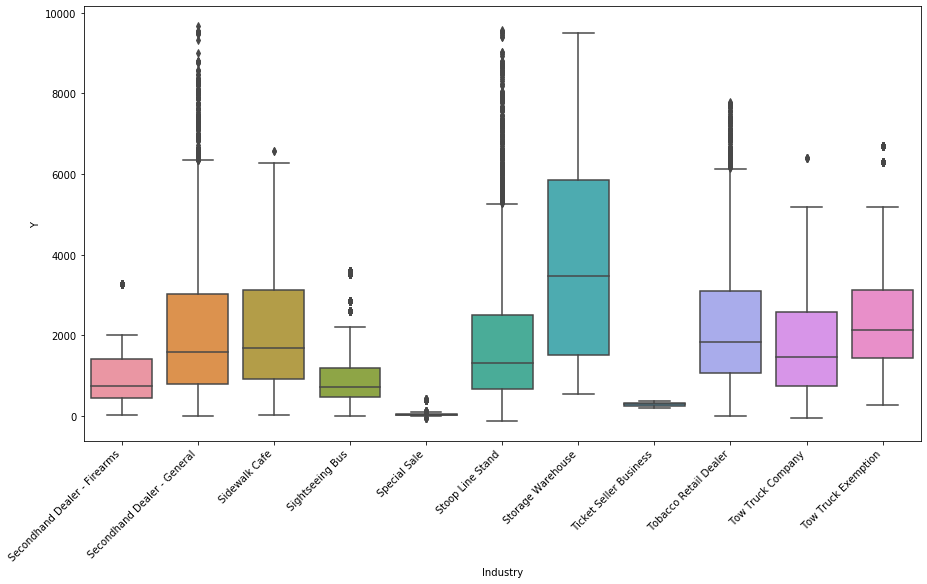

In [379]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='Industry', y='Y',data=df_com4)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

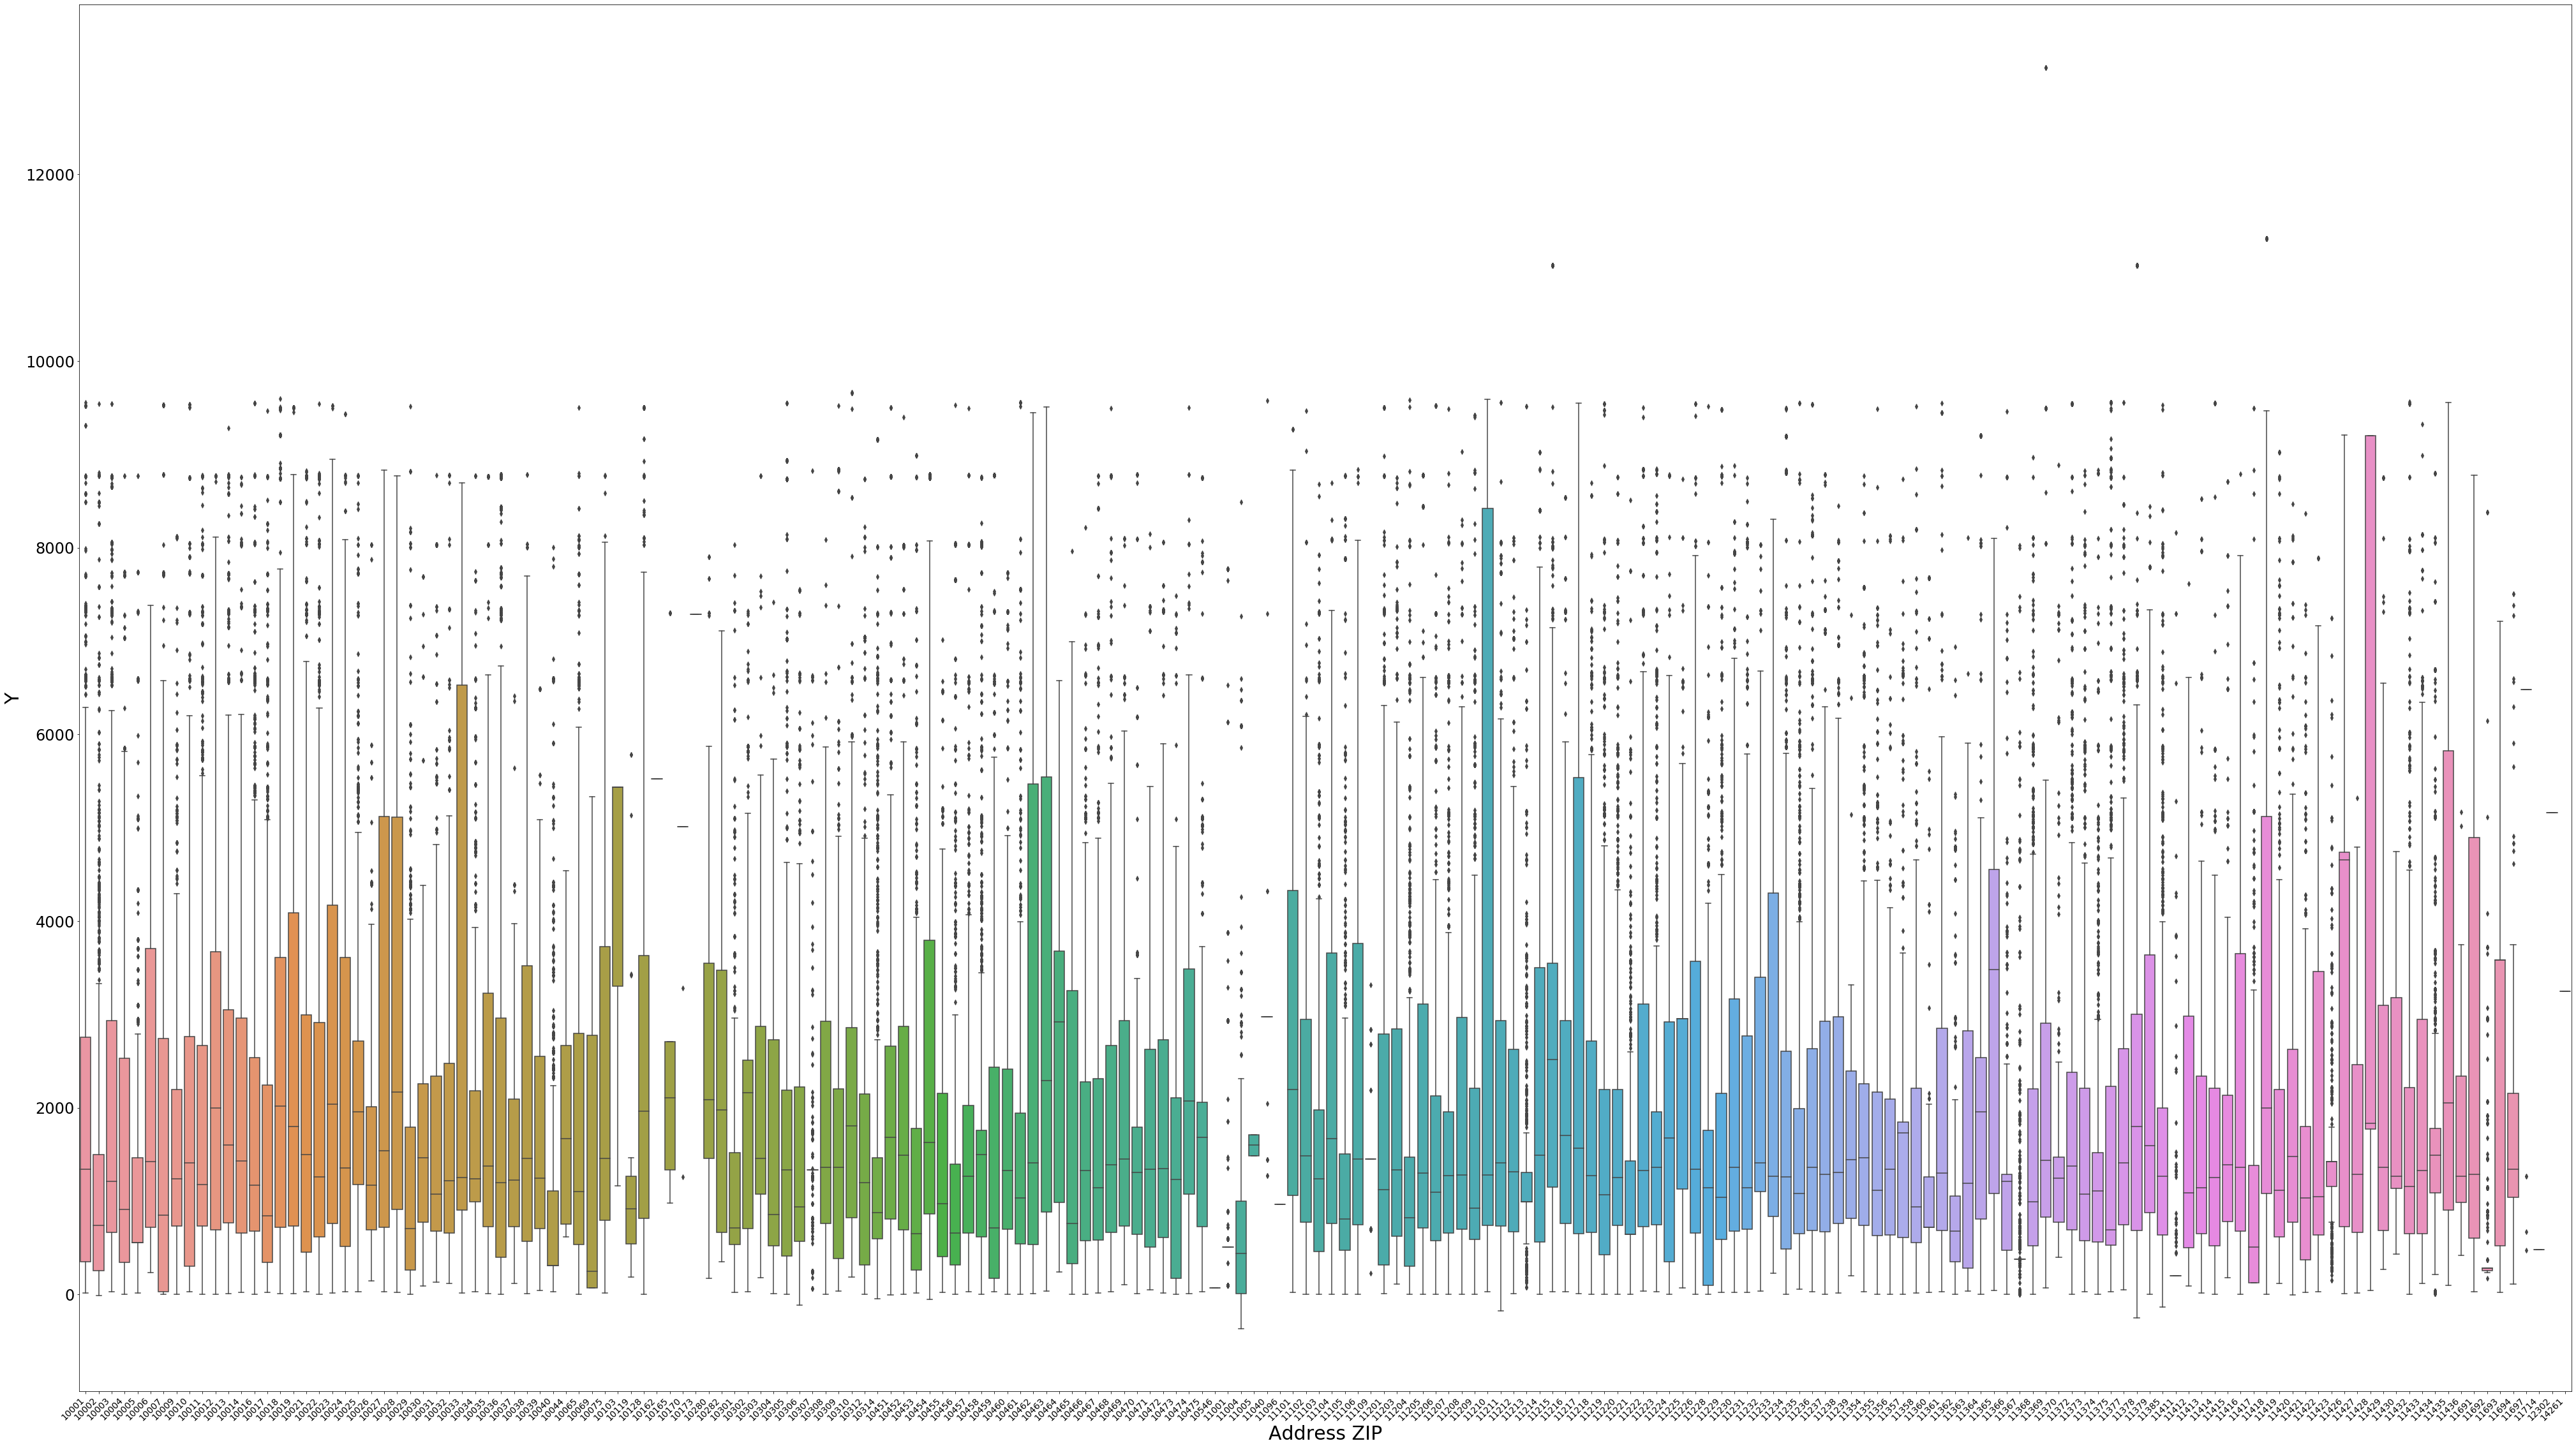

In [380]:

plt.figure(figsize=(70,40))
ax=sns.boxplot(x='Address ZIP', y='Y',data=df_com)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.xlabel('Address ZIP', fontsize=30)
plt.ylabel('Y', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)

plt.show()


* Choice of baseline model: 
    * Regression problem:
        * linear regression
        * regression tree
    * Classification problem:
        * SVM 
        * Logistic Regression
* Evaluation metrics for linear regression: 
    * RSE - mean squared error
    * R2-score
    * P-values
    
* Data exploration:
    * observe lifespan distribution (XYQ)
* Feature Selection: Why does our baseline perform so badly?
    * Finding feature correlations with Y
        * Correlation (ZYH)
        * Stepwise Selection (ZYH)
        * Mutual Information (DYD)
        * Lift/leverage (XYQ)
* Model Selection:
    * Cox proportional regression (ZYH)
    * As a classification problem: https://arxiv.org/abs/1909.11171 (DYD, XYQ)

In [381]:
df_baseline = df_com.iloc[:,9:]
df_baseline
#drop(['License Expiration Date','License Status','License Creation Date','Longitude','Latitude'],axis=1)

,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,Y,right_censor,Creation Year
0,66631,303834,37.6,22554,61090,689,0.543426,0.757035,1,0,...,0,0,0,0,0,0,0,2934,0,2012
1,93386,499519,31.0,31118,35809,1044,0.546891,0.867336,1,0,...,0,0,0,0,0,0,0,756,1,2009
2,59707,2683670,30.7,22839,45536,1083,0.540004,0.656841,1,0,...,0,0,0,0,0,0,0,207,1,2013
3,27232,283043,36.8,11831,63122,614,0.513624,0.424060,1,0,...,0,0,0,0,0,0,0,3658,1,2002
4,86408,778241,33.9,30859,46013,2246,0.514663,0.272880,1,0,...,0,0,0,0,0,0,0,7948,0,2000
5,98592,614938,34.6,34843,64481,2028,0.507972,0.314579,1,0,...,0,0,0,0,0,0,0,273,0,2019
6,34821,179406,42.4,13881,79573,687,0.525315,0.154160,1,0,...,0,0,0,0,0,0,0,3638,0,2012
7,24711,20909385,36.5,15183,93707,6085,0.442111,0.334669,1,0,...,0,0,0,0,0,0,0,2181,1,2006
8,28265,713975,31.3,8403,53908,1304,0.453812,0.523970,1,0,...,0,0,0,0,0,0,0,1408,0,2016
9,85510,869649,40.4,30709,80956,1895,0.518898,0.223728,1,0,...,0,0,0,0,0,0,0,774,1,2007


In [382]:
names = df_com['Industry'].unique().tolist()
names.append('right_censor')
df_baseline = df_baseline.apply(lambda x: x if x.name in names else preprocessing.scale(x))
df_baseline

,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,Y,right_censor,Creation Year
0,0.538798,-0.488474,0.382645,0.218890,-0.271198,-0.776751,0.860223,1.182888,1,0,...,0,0,0,0,0,0,0,0.437156,0,0.153586
1,1.563256,-0.454360,-1.160223,1.156944,-1.024761,-0.576568,0.983013,1.637603,1,0,...,0,0,0,0,0,0,0,-0.605177,1,-0.343361
2,0.273676,-0.073587,-1.230354,0.250107,-0.734823,-0.554576,0.738978,0.769836,1,0,...,0,0,0,0,0,0,0,-0.867914,1,0.319236
3,-0.969802,-0.492099,0.195631,-0.955650,-0.210630,-0.819043,-0.195681,-0.189807,1,0,...,0,0,0,0,0,0,0,0.783643,1,-1.502906
4,1.296066,-0.405769,-0.482296,1.128575,-0.720605,0.101234,-0.158857,-0.813049,1,0,...,0,0,0,0,0,0,0,2.836724,0,-1.834204
5,1.762595,-0.434238,-0.318659,1.564961,-0.170121,-0.021695,-0.395914,-0.641142,1,0,...,0,0,0,0,0,0,0,-0.836328,0,1.313131
6,-0.679217,-0.510166,1.504731,-0.731104,0.279733,-0.777878,0.218556,-1.302473,1,0,...,0,0,0,0,0,0,0,0.774072,0,0.153586
7,-1.066332,3.103783,0.125500,-0.588490,0.701031,2.266027,-2.729423,-0.558323,1,0,...,0,0,0,0,0,0,0,0.076790,1,-0.840309
8,-0.930248,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,1,0,...,0,0,0,0,0,0,0,-0.293147,0,0.816183
9,1.261681,-0.389833,1.037195,1.112145,0.320956,-0.096693,-0.008795,-1.015677,1,0,...,0,0,0,0,0,0,0,-0.596563,1,-0.674660


In [383]:
from sklearn.model_selection import *
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#df_baseline = df_com[['Income Per Household','Y']]

#fit a baseline model
X = df_baseline.drop(['Y'],axis=1)
Y = df_baseline['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75,test_size=0.25, random_state=1)


In [384]:
#First round regression

X_train = sm.add_constant(X_train)
lr1 = sm.OLS(Y_train,X_train).fit()

X_test = sm.add_constant(X_test)
Y_pred = lr1.predict(X_test) 

display(lr1.summary())


# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



#display(Y_test)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:55:40   Log-Likelihood:                -71364.
No. Observations:              176250   AIC:                         1.428e+05
Df Residuals:                  176193   BIC:                         1.434e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.5788      0.002    362.412      0.000       0.576       0.582
Population                        -0.0250      0.003     -7.536      0.000      -0.032      -0.018
Business Annual Payroll           -0.0071      0.002     -4.181      0.000      -0.010      -0.004
Median Age                         0.0104      0.001      9.902      0.000       0.008       0.012
Households                         0.0162      0.003      5.191      0.000       0.010       0.022
Income Per Household              -0.0079      0.001     -5.747      0.000      -0.011      -0.005
Number of Businesses               0.0155      0.002      9.755      0.000       0.012       0.019
female_percentage                 -0.0057      0.001     -4.923      0.000      -0.008      -0.003
colored_percentage                 0.0067      0.001      4.819      0.000       0.004       0.009
Amusement Arcade                  -0.2163      0.006    -36.618      0.000      -0.228      -0.205
Amusement Device Permanent         0.0548      0.006      9.054      0.000       0.043       0.067
Amusement Device Portable          0.0458      0.006      7.639      0.000       0.034       0.058
Amusement Device Temporary        -0.1125      0.006    -18.695      0.000      -0.124      -0.101
Auction House Premises            -0.0453      0.006     -7.473      0.000      -0.057      -0.033
Bingo Game Operator               -0.0935      0.006    -15.834      0.000      -0.105      -0.082
Booting Company                   -0.0376      0.006     -6.200      0.000      -0.049      -0.026
Cabaret                           -0.0118      0.006     -1.998      0.046      -0.023      -0.000
Car Wash                           0.2228      0.006     37.061      0.000       0.211       0.235
Catering Establishment             0.0896      0.006     15.085      0.000       0.078       0.101
Commercial Lessor                  0.2018      0.007     30.499      0.000       0.189       0.215
Dealer In Products                -0.0392      0.006     -6.659      0.000      -0.051      -0.028
Debt Collection Agency            -0.0957      0.006    -16.283      0.000      -0.107      -0.084
Electronic & Appliance Service    -0.0114      0.006     -1.933      0.053      -0.023       0.000
Electronic Cigarette Dealer        0.0048      0.006      0.782      0.434      -0.007       0.017
Electronics Store                  0.0246      0.006      4.153      0.000       0.013       0.036
Employment Agency                 -0.1066      0.006    -18.058      0.000      -0.118      -0.095
Games of Chance                   -0.0219      0.006     -3.718      0.000      -0.033      -0.010
Gaming Cafe                       -0.2077      0.006    -34.404      0.000      -0.220      -0.196
Garage        

MAE:  0.2918846695238015
MSE:  0.13195074384396366
RMSE:  0.3632502496130783


In [385]:
X_train.head()


,const,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.0,-1.812304,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,1.0,1.031250,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,1.0,-1.278575,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,1.0,-0.930248,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,1.0,0.686790,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,...,0,0,0,0,0,0,0,0,1,0.153586


In [386]:
#Backward selection process:
#We will look at the significance of each feature, and delete those whose P-value >=0.05 until all the features
#in the model contained are significant.

#Second round regression

pv=lr1.pvalues.values.tolist()
x_col=X_train.columns.tolist()

res = dict(zip(x_col, pv))

res_temp={}
for key in res:
    if key=='const':
        res_temp[key]=res[key]
    elif res[key]<0.05:
        res_temp[key]=res[key]
print(len(res_temp))
key_temp=list(res_temp.keys()) 



55


In [387]:
X_train2=X_train[key_temp]
X_train2.head()

,const,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.0,-1.812304,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,1.0,1.031250,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,1.0,-1.278575,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,1.0,-0.930248,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,1.0,0.686790,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,...,0,0,0,0,0,0,0,0,1,0.153586


In [388]:
lr2 = sm.OLS(Y_train,X_train2).fit()
pv=lr2.pvalues.values.tolist()
x_col=X_train2.columns.tolist()

res = dict(zip(x_col, pv))

res_temp={}
for key in res:
    if key=='const':
        res_temp[key]=res[key]
    elif res[key]<=0.05:
        res_temp[key]=res[key]
print(len(res_temp))
key_temp=list(res_temp.keys()) 


53


In [389]:
lr2.pvalues.head()

const                      0.000000e+00
Population                 1.617555e-14
Business Annual Payroll    6.503722e-05
Median Age                 4.471696e-23
Households                 1.045545e-07
dtype: float64

In [400]:
X_train3=X_train2[key_temp]
X_train3.head()

,const,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.0,-1.812304,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,1.0,1.031250,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,1.0,-1.278575,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,1.0,-0.930248,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,1.0,0.686790,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,...,0,0,0,0,0,0,0,0,1,0.153586


In [401]:
lr3 = sm.OLS(Y_train,X_train3).fit()

pv=lr3.pvalues.values.tolist()
x_col=X_train3.columns.tolist()

res = dict(zip(x_col, pv))

res_temp={}
for key in res:
    if key=='const':
        res_temp[key]=res[key]
    elif res[key]<=0.05:
        res_temp[key]=res[key]
print(len(res_temp))
key_temp=list(res_temp.keys()) 

53


In [402]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 2.235e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:15:01   Log-Likelihood:                -71371.
No. Observations:              176250   AIC:                         1.428e+05
Df Residuals:                  176197   BIC:                         1.434e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5794      0.003    199.254      0.000       0.574       0.585
Population                      -0.0253      0.003     -7.645      0.000      -0.032      -0.019
Business Annual Payroll         -0.0068      0.002     -4.104      0.000      -0.010      -0.004
Median Age                       0.0104      0.001      9.923      0.000       0.008       0.012
Households                       0.0162      0.003      5.220      0.000       0.010       0.022
Income Per Household            -0.0081      0.001     -5.891      0.000      -0.011      -0.005
Number of Businesses             0.0154      0.002      9.685      0.000       0.012       0.019
female_percentage               -0.0057      0.001     -4.987      0.000      -0.008      -0.003
colored_percentage               0.0066      0.001      4.754      0.000       0.004       0.009
Amusement Arcade                -0.2162      0.007    -32.954      0.000      -0.229      -0.203
Amusement Device Permanent       0.0550      0.007      8.174      0.000       0.042       0.068
Amusement Device Portable        0.0461      0.007      6.908      0.000       0.033       0.059
Amusement Device Temporary      -0.1118      0.007    -16.661      0.000      -0.125      -0.099
Auction House Premises          -0.0455      0.007     -6.862      0.000      -0.059      -0.033
Bingo Game Operator             -0.0932      0.007    -14.152      0.000      -0.106      -0.080
Booting Company                 -0.0374      0.007     -5.562      0.000      -0.051      -0.024
Car Wash                         0.2229      0.007     33.554      0.000       0.210       0.236
Catering Establishment           0.0901      0.007     13.625      0.000       0.077       0.103
Commercial Lessor                0.2012      0.007     28.058      0.000       0.187       0.215
Dealer In Products              -0.0390      0.007     -5.961      0.000      -0.052      -0.026
Debt Collection Agency          -0.0954      0.007    -14.599      0.000      -0.108      -0.083
Electronics Store                0.0250      0.007      3.789      0.000       0.012       0.038
Employment Agency               -0.1066      0.007    -16.352      0.000      -0.119      -0.094
Games of Chance                 -0.0216      0.007     -3.299      0.001      -0.034      -0.009
Gaming Cafe                     -0.2071      0.007    -30.903      0.000      -0.220      -0.194
Garage                           0.1414      0.007     21.701      0.000       0.129       0.154
Garage and Parking Lot           0.1074      0.007     16.350      0.000       0.095       0.120
General Vendor Distributor      -0.2350      0.007    -35.546      0.000      -0.248      -0.222
Home Improvement Contractor      0.0506      0.007      7.705      0.000    

In [403]:
# Glance the features we dropped, and drop them from the text dataset.
x_co1l=X_train.columns.tolist()
x_col3=X_train3.columns.tolist()

col_rm=[]
for i in x_co1l:
    if i not in x_col3:
        col_rm.append(i)

X_test = sm.add_constant(X_test)        
X_test3=X_test.drop(col_rm, axis=1)

Y_pred = lr3.predict(X_test3) 
# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



MAE:  0.2919682253240432
MSE:  0.13197137353771587
RMSE:  0.3632786444834266


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
# #Backward selection
# cols = list(X_train.columns)
# len(cols)
# pmax = 1

# while (len(cols)>0):
#     p= []
# #     X_1 = X[cols]
# #     X_1 = sm.add_constant(X_1)
#     lr = sm.OLS(Y_train,X_train).fit()

#     p = pd.Series(lr.pvalues.values[:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(selected_features_BE)

In [26]:
# import statsmodels.formula.api as smf

# def forward_selected(data, response):
#     """Linear model designed by forward selection.

#     Parameters:
#     -----------
#     data : pandas DataFrame with all possible predictors and response

#     response: string, name of response column in data

#     Returns:
#     --------
#     model: an "optimal" fitted statsmodels linear model
#            with an intercept
#            selected by forward selection
#            evaluated by adjusted R-squared
#     """
#     remaining = set(data.columns)
#     remaining.remove(response)
#     selected = []
#     current_score, best_new_score = 0.0, 0.0
#     while remaining and current_score == best_new_score:
#         scores_with_candidates = []
#         for candidate in remaining:
#             formula = "{} ~ {} + 1".format(response,
#                                            ' + '.join(selected + [candidate]))
#             score = smf.ols(formula, data).fit().rsquared_adj
#             scores_with_candidates.append((score, candidate))
#         scores_with_candidates.sort()
#         best_new_score, best_candidate = scores_with_candidates.pop()
#         if current_score < best_new_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             current_score = best_new_score
#     formula = "{} ~ {} + 1".format(response,
#                                    ' + '.join(selected))
#     model = smf.ols(formula, data).fit()
#     return model

In [27]:
# model = forward_selected(df_baseline, 'Y')



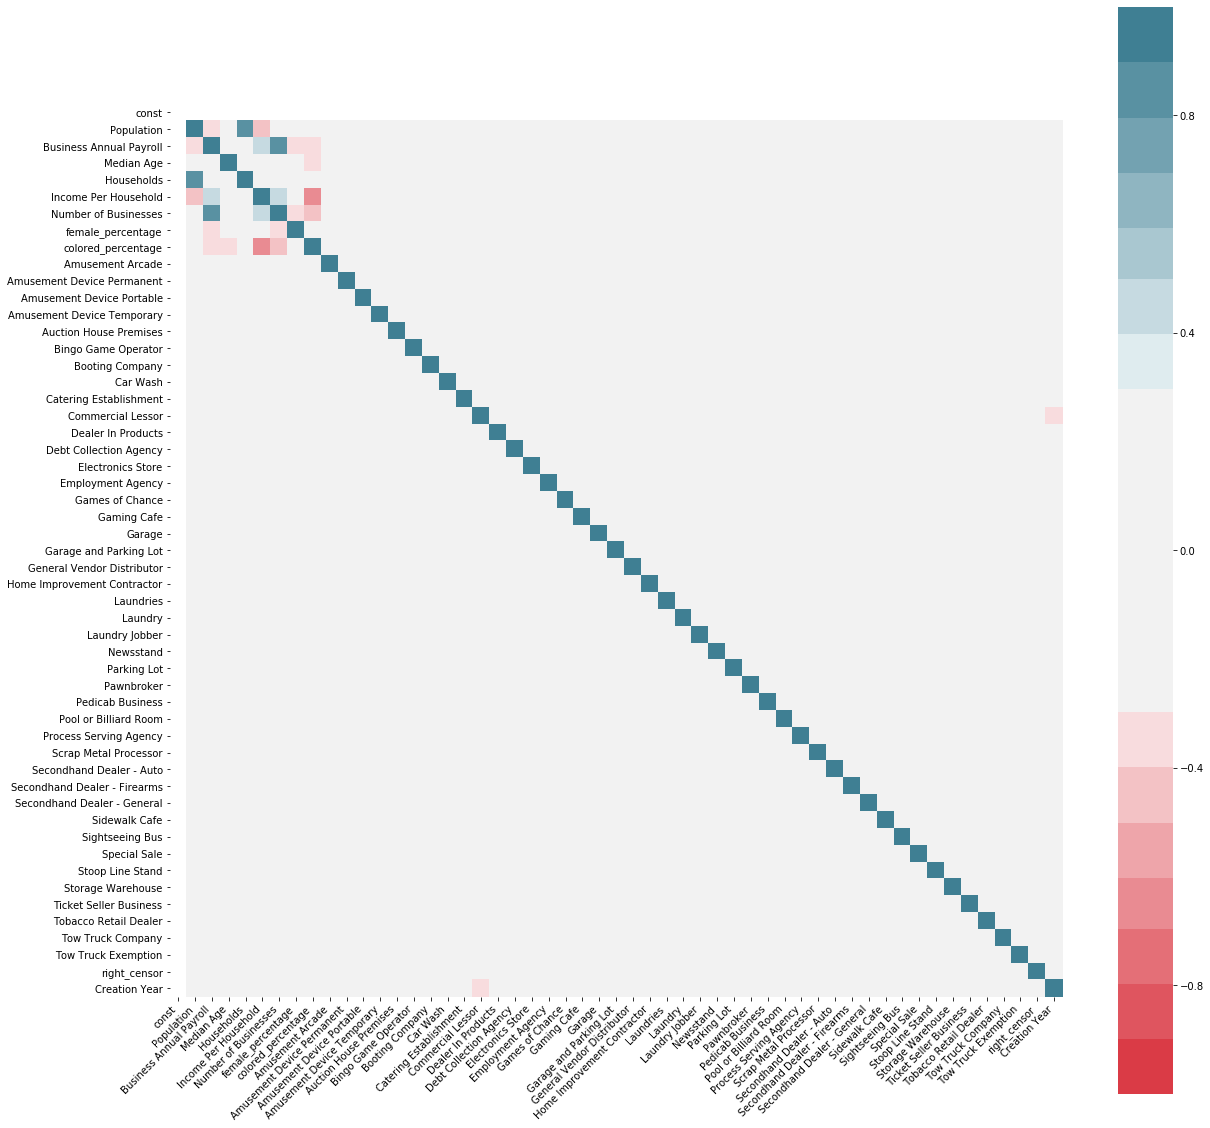

In [394]:
plt.figure(figsize=(20,20))
corr = X_train3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, sep=80, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [397]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train3.values, j) for j in range(X_train3.shape[1])]

[11.322416208703862,
 14.680761360613307,
 3.7260546795253053,
 1.4644475574976161,
 12.910363561607264,
 2.5498889550837975,
 3.389904601630321,
 1.7653951348532952,
 2.618900114213092,
 1.2069337967440985,
 1.2521779218681124,
 1.2306072074318797,
 1.244886236824599,
 1.2151210301420312,
 1.2048335543370794,
 1.2510131750999909,
 1.242722035271407,
 1.210842112541873,
 1.4205267721943036,
 1.1956054188847587,
 1.2052381987662797,
 1.1924021848581536,
 1.1866511156164894,
 1.201475767905326,
 1.261747061180657,
 1.2124884604758135,
 1.191318105170904,
 1.2012401853696066,
 1.196733891053425,
 1.2414077453398094,
 1.224468844409278,
 1.231095091346126,
 1.2188628958723184,
 1.2000901477891495,
 1.191966705161391,
 1.2154412396680008,
 1.201484272263711,
 1.2086218718652868,
 1.2038011534371427,
 1.207830954781393,
 1.2423116962289658,
 1.1853041275843106,
 1.2229139251612884,
 1.1998730979901124,
 1.220253200727535,
 1.198178174301,
 1.219012133451505,
 1.2365310452360603,
 1.195694851

In [399]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

calculate_vif(X_train3) 

Iteration no.
1
[11.322416208703862, 14.680761360613307, 3.7260546795253053, 1.4644475574976161, 12.910363561607264, 2.5498889550837975, 3.389904601630321, 1.7653951348532952, 2.618900114213092, 1.2069337967440985, 1.2521779218681124, 1.2306072074318797, 1.244886236824599, 1.2151210301420312, 1.2048335543370794, 1.2510131750999909, 1.242722035271407, 1.210842112541873, 1.4205267721943036, 1.1956054188847587, 1.2052381987662797, 1.1924021848581536, 1.1866511156164894, 1.201475767905326, 1.261747061180657, 1.2124884604758135, 1.191318105170904, 1.2012401853696066, 1.196733891053425, 1.2414077453398094, 1.224468844409278, 1.231095091346126, 1.2188628958723184, 1.2000901477891495, 1.191966705161391, 1.2154412396680008, 1.201484272263711, 1.2086218718652868, 1.2038011534371427, 1.207830954781393, 1.2423116962289658, 1.1853041275843106, 1.2229139251612884, 1.1998730979901124, 1.220253200727535, 1.198178174301, 1.219012133451505, 1.2365310452360603, 1.1956948516800099, 1.1986419684515839, 1.2

,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,Amusement Device Portable,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,0,0,...,0,0,0,0,0,0,0,0,1,0.153586
161454,-0.524219,0.055370,-1.221053,0.500993,-0.970730,0.949043,1.841163,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.509010
207175,-0.437227,0.639790,1.151139,-0.018193,-0.064551,-0.036434,-1.105569,0,0,0,...,0,0,1,0,0,0,0,0,0,1.147482
108479,-0.477824,-1.440745,0.828779,-1.295561,-0.776751,0.545055,1.432100,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.509010
152155,-0.176548,-0.622557,0.966354,-1.078235,-0.563034,0.810349,0.712672,0,0,0,...,0,0,0,0,0,0,0,0,0,1.313131
100250,-0.477824,-1.440745,0.828779,-1.295561,-0.776751,0.545055,1.432100,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.840309


In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [396]:
calculate_vif_(X_train3)

dropping 'Population' at index: 1
dropping 'const' at index: 0
Remaining variables:
Index(['Business Annual Payroll', 'Median Age', 'Households',
       'Income Per Household', 'Number of Businesses', 'female_percentage',
       'colored_percentage', 'Amusement Arcade', 'Amusement Device Permanent',
       'Amusement Device Portable', 'Amusement Device Temporary',
       'Auction House Premises', 'Bingo Game Operator', 'Booting Company',
       'Car Wash', 'Catering Establishment', 'Commercial Lessor',
       'Dealer In Products', 'Debt Collection Agency', 'Electronics Store',
       'Employment Agency', 'Games of Chance', 'Gaming Cafe', 'Garage',
       'Garage and Parking Lot', 'General Vendor Distributor',
       'Home Improvement Contractor', 'Laundries', 'Laundry', 'Laundry Jobber',
       'Newsstand', 'Parking Lot', 'Pawnbroker', 'Pedicab Business',
       'Pool or Billiard Room', 'Process Serving Agency',
       'Scrap Metal Processor', 'Secondhand Dealer - Auto',
       'Second

,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,Amusement Device Portable,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,0,0,...,0,0,0,0,0,0,0,0,1,0.153586
161454,-0.524219,0.055370,-1.221053,0.500993,-0.970730,0.949043,1.841163,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.509010
207175,-0.437227,0.639790,1.151139,-0.018193,-0.064551,-0.036434,-1.105569,0,0,0,...,0,0,1,0,0,0,0,0,0,1.147482
108479,-0.477824,-1.440745,0.828779,-1.295561,-0.776751,0.545055,1.432100,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.509010
152155,-0.176548,-0.622557,0.966354,-1.078235,-0.563034,0.810349,0.712672,0,0,0,...,0,0,0,0,0,0,0,0,0,1.313131
100250,-0.477824,-1.440745,0.828779,-1.295561,-0.776751,0.545055,1.432100,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.840309


In [404]:
X_train3vif=X_train3.drop('Population', axis=1)

In [405]:
X_train3vif.head()

,const,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year
119511,1.0,1.438790,-0.645934,-1.915831,1.122926,2.544027,-1.901404,-0.255566,0,0,...,0,0,0,0,0,0,0,0,1,-1.668555
142311,1.0,-0.441655,-1.768020,0.618363,-1.134452,-0.540479,-0.092709,0.817310,0,0,...,0,0,0,0,0,0,0,0,1,-1.337257
82696,1.0,-0.528061,0.312515,-1.644733,0.043956,-0.984264,-0.133091,1.151090,0,0,...,0,0,0,0,0,0,0,0,1,-1.171607
113326,1.0,-0.416973,-1.090093,-1.331135,-0.485276,-0.429955,-2.314838,0.222072,0,0,...,0,0,0,0,0,0,0,0,0,-0.509010
94035,1.0,-0.423180,-1.557629,0.253831,-1.286261,-0.688783,0.533368,1.223417,0,0,...,0,0,0,0,0,0,0,0,1,0.153586


In [406]:
lr4 = sm.OLS(Y_train,X_train3vif).fit()

pv=lr4.pvalues.values.tolist()
x_col=X_train3vif.columns.tolist()

res = dict(zip(x_col, pv))

res_temp={}
for key in res:
    if key=='const':
        res_temp[key]=res[key]
    elif res[key]<=0.05:
        res_temp[key]=res[key]
print(len(res_temp))
key_temp=list(res_temp.keys()) 

51


In [407]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 2.278e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:15:37   Log-Likelihood:                -71400.
No. Observations:              176250   AIC:                         1.429e+05
Df Residuals:                  176198   BIC:                         1.434e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5807      0.003    199.944      0.000       0.575       0.586
Business Annual Payroll         -0.0025      0.002     -1.568      0.117      -0.006       0.001
Median Age                       0.0118      0.001     11.421      0.000       0.010       0.014
Households                      -0.0063      0.001     -6.445      0.000      -0.008      -0.004
Income Per Household            -0.0058      0.001     -4.291      0.000      -0.008      -0.003
Number of Businesses             0.0158      0.002      9.910      0.000       0.013       0.019
female_percentage               -0.0023      0.001     -2.211      0.027      -0.004      -0.000
colored_percentage               0.0029      0.001      2.246      0.025       0.000       0.006
Amusement Arcade                -0.2187      0.007    -33.376      0.000      -0.232      -0.206
Amusement Device Permanent       0.0510      0.007      7.603      0.000       0.038       0.064
Amusement Device Portable        0.0415      0.007      6.251      0.000       0.029       0.055
Amusement Device Temporary      -0.1148      0.007    -17.132      0.000      -0.128      -0.102
Auction House Premises          -0.0471      0.007     -7.104      0.000      -0.060      -0.034
Bingo Game Operator             -0.0944      0.007    -14.337      0.000      -0.107      -0.081
Booting Company                 -0.0357      0.007     -5.319      0.000      -0.049      -0.023
Car Wash                         0.2202      0.007     33.199      0.000       0.207       0.233
Catering Establishment           0.0874      0.007     13.239      0.000       0.074       0.100
Commercial Lessor                0.2007      0.007     27.989      0.000       0.187       0.215
Dealer In Products              -0.0414      0.007     -6.336      0.000      -0.054      -0.029
Debt Collection Agency          -0.0976      0.007    -14.946      0.000      -0.110      -0.085
Electronics Store                0.0234      0.007      3.544      0.000       0.010       0.036
Employment Agency               -0.1071      0.007    -16.432      0.000      -0.120      -0.094
Games of Chance                 -0.0240      0.007     -3.658      0.000      -0.037      -0.011
Gaming Cafe                     -0.2113      0.007    -31.638      0.000      -0.224      -0.198
Garage                           0.1426      0.007     21.903      0.000       0.130       0.155
Garage and Parking Lot           0.1084      0.007     16.502      0.000       0.096       0.121
General Vendor Distributor      -0.2378      0.007    -36.012      0.000      -0.251      -0.225
Home Improvement Contractor      0.0474      0.007      7.229      0.000       0.035       0.060
Laundries                       -0.1715      0.007    -25.822      0.000    

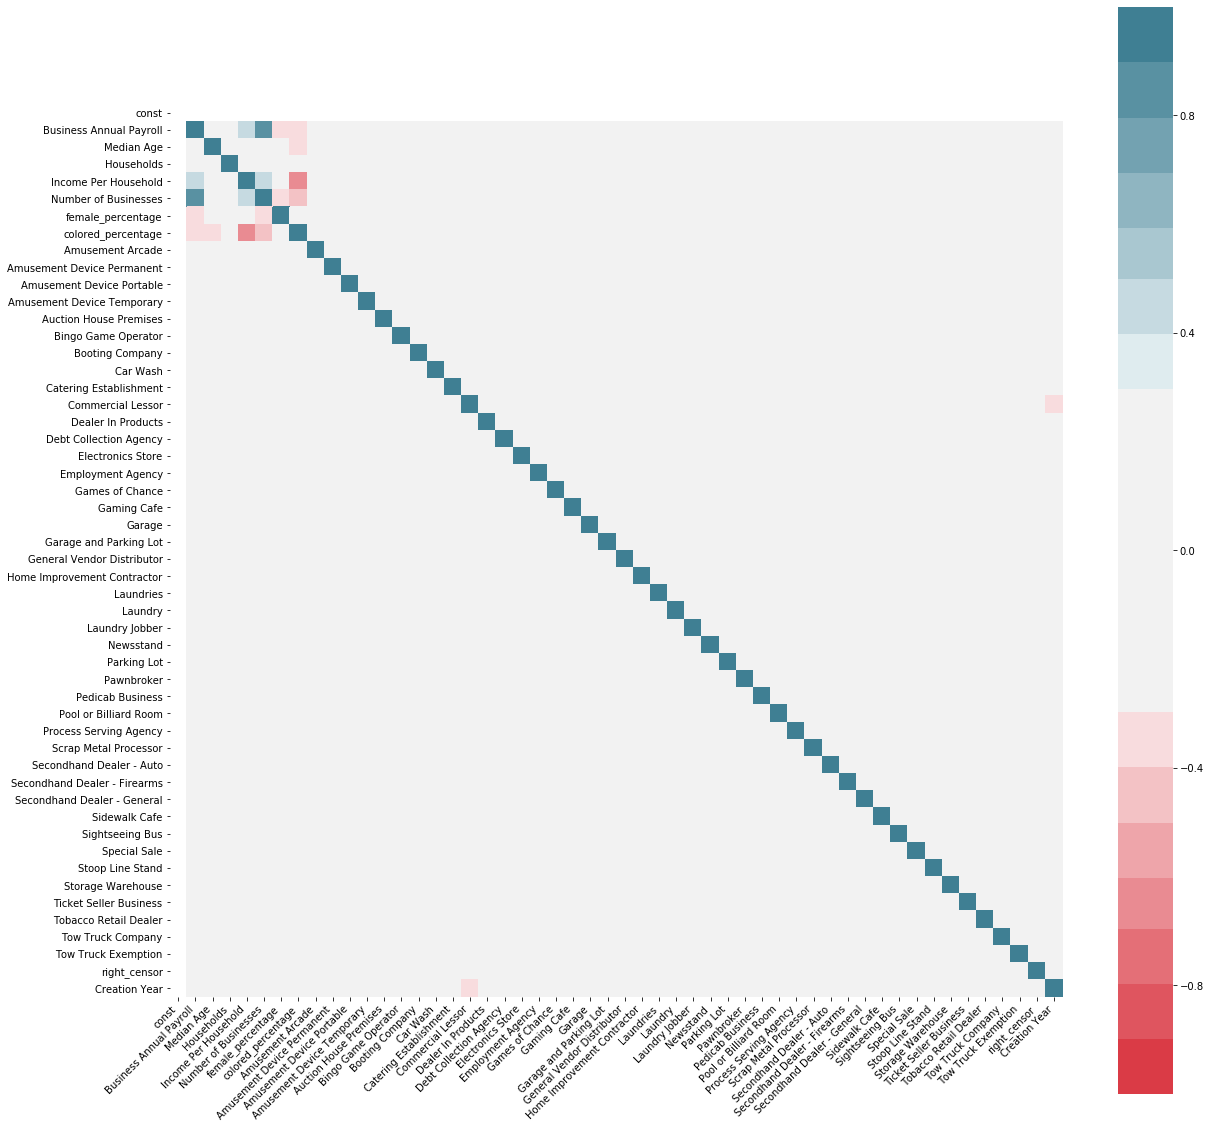

In [408]:
plt.figure(figsize=(20,20))
corr = X_train3vif.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, sep=80, n=20),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [409]:
#Linear regression assumptions check

from scipy import stats
stats.shapiro(lr4.resid)

//anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9949010610580444, 0.0)

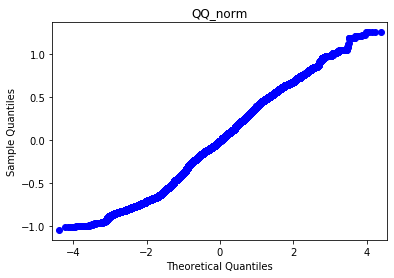

In [430]:
# QQ Plot
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

sm.qqplot(lr4.resid)
plt.title('QQ_norm')
plt.show()


### Feature Selection ends.
    *  So far the correlation and stepwise selection of baseline regression model ends.
    *  According to the backward selection and VIF dectection process we drop 8 features from the orignial 58 features.

In [358]:
from lifelines import CoxPHFitter

In [359]:
from lifelines.datasets import load_rossi

df_train = pd.concat([X_train3vif.drop(['const','Laundry Jobber'],axis=1),Y_train],axis=1)

df_train.head()

,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,Amusement Device Portable,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year,Y
29998,-0.436035,-0.339930,-1.043747,-0.093333,-0.734047,-0.714718,0.516616,0,0,0,...,0,0,0,0,0,0,0,1,0.318904,-0.629733
54070,-0.485009,-0.316581,-0.311484,-0.316081,-0.640886,-0.348437,0.967645,0,0,0,...,0,0,0,0,0,0,0,1,-3.649655,2.731397
71095,0.442525,0.734130,1.063766,1.583089,1.048925,-1.023003,-1.234772,0,0,0,...,0,0,0,0,0,0,0,0,1.145687,-0.359830
234291,-0.408168,-0.480025,1.125581,-0.719401,0.095425,-0.152848,-0.814665,0,0,0,...,0,0,0,0,0,0,1,0,-0.838592,1.413887
41151,-0.485009,-0.316581,-0.311484,-0.316081,-0.640886,-0.348437,0.967645,0,0,0,...,0,0,0,0,0,0,0,1,1.145687,-0.791197


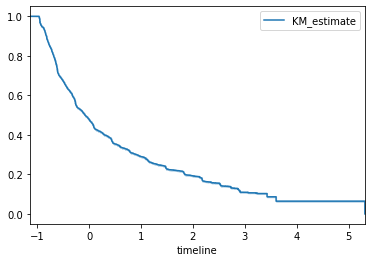

In [360]:
#Lifeline using data after normalized
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

d=df_train['Y']
e=df_train['right_censor']

kmf.fit(d, event_observed=e)
kmf.plot()


In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

d=df_train['Y']
e=df_train['right_censor']

kmf.fit(d, event_observed=e)
kmf.plot()

In [361]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph.fit(df_train, 'Y', event_col='right_censor',step_size=0.01)   ## Fit the data to train the model
#cph.print_summary()    ## HAve a look at the significance of the features 

<lifelines.CoxPHFitter: fitted with 176250 total observations, 61225 right-censored observations>

In [362]:
cph.print_summary()  

In [364]:
# cph.check_assumptions(df_train)
# from lifelines.statistics import proportional_hazard_test


# results = proportional_hazard_test(cph, df_train, time_transform='rank')
# results.print_summary(decimals=3, model="untransformed variables")

KeyboardInterrupt: 

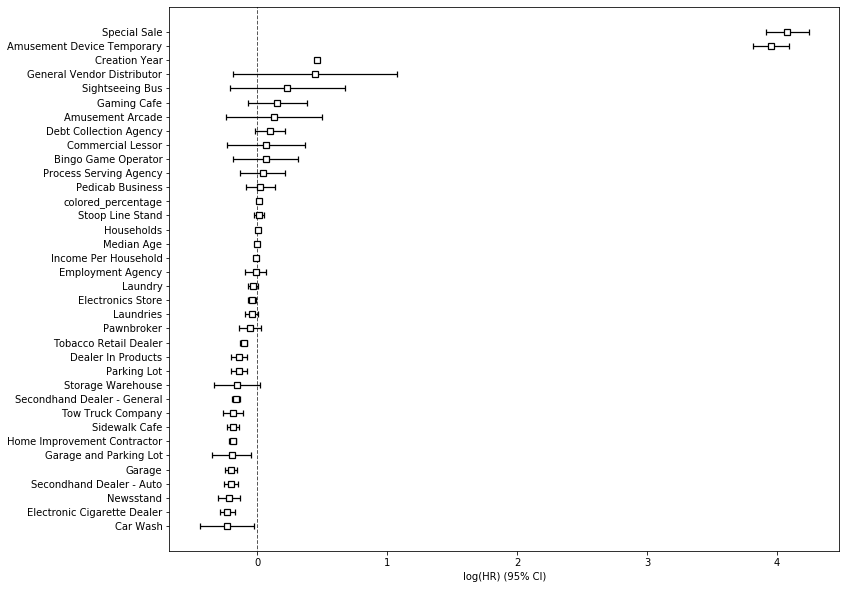

In [46]:
plt.figure(figsize=(12,10))
cph.plot()